## Parte 2: Exploracion y Mineria

In [4]:
#Carga de librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
#carga de datos

poblacion = pd.read_csv("NucleosPoblacion.csv")

poblacion.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


##### Municipios que tienen mas de 100,000 de poblacion

In [10]:
municipios_100000 = poblacion[poblacion["Poblacion"]>100000]["Municipio"]
municipios_100000

9      Las Palmas de Gran Canaria
16                          Telde
28     San Cristóbal de La Laguna
40         Santa Cruz de Tenerife
42                        Badajoz
                  ...            
683      Santa Coloma de Gramenet
689                      Terrassa
725                        Lleida
735                          Reus
737                     Tarragona
Name: Municipio, Length: 62, dtype: object

In [12]:
print("La cantidad de municipios con mas de 100,000 habitantes es:", len(municipios_100000))

La cantidad de municipios con mas de 100,000 habitantes es: 62


### Grafica de barras

In [45]:
poblacion_suma = poblacion.groupby("Provincia").Poblacion.sum().reset_index()
poblacion_suma

,Provincia,Poblacion
0,A Coruña,818982.0
1,Alacant/Alicante,1804252.0
2,Albacete,280673.0
3,Almería,550604.0
4,Asturias,965777.0
5,Badajoz,361700.0
6,Barcelona,4934795.0
7,Burgos,250766.0
8,Cantabria,437448.0
9,Castelló/Castellón,476388.0


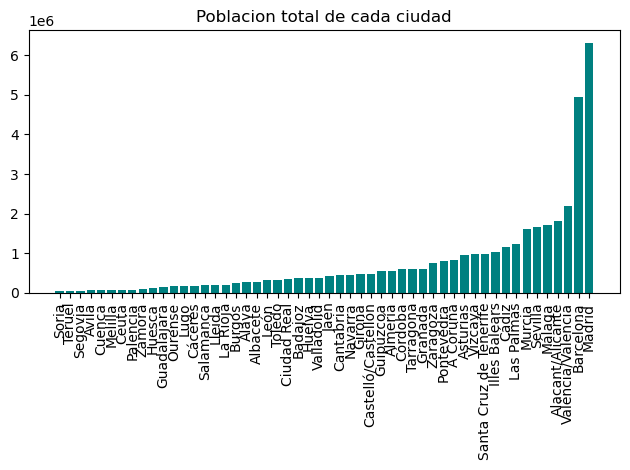

In [46]:
poblacion_suma = poblacion_suma.sort_values("Poblacion").reset_index()

plt.bar(poblacion_suma.Provincia, poblacion_suma.Poblacion, color = "teal")
plt.title("Poblacion total de cada ciudad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

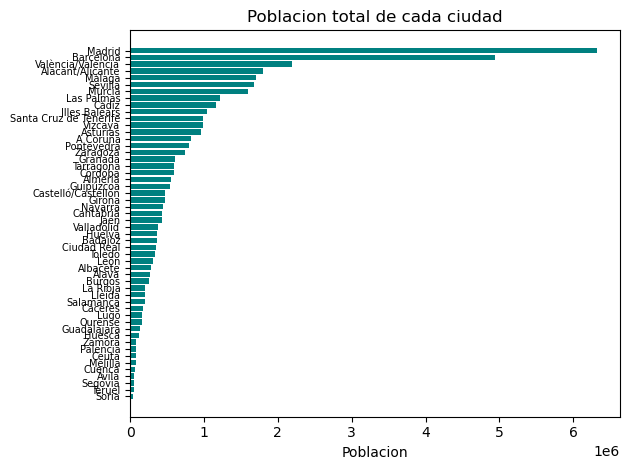

In [47]:
poblacion_suma = poblacion_suma.sort_values("Poblacion").reset_index()

plt.barh(poblacion_suma.Provincia, poblacion_suma.Poblacion, color = "teal")
plt.title("Poblacion total de cada ciudad")
plt.yticks(rotation=0, fontsize=7)
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
plt.xlabel("Poblacion")
plt.tight_layout()
plt.show()

In [48]:
poblacion_suma.loc[poblacion_suma["Provincia"] == "Granada"]


,level_0,index,Provincia,Poblacion
35,35,17,Granada,604357.0


1. ¿Cuál es la segunda ciudad más poblada? 

La segunda ciudad mas poblada es la ciudad de Barcelona

2. ¿Qué posición ocupa Granada en el ranking de
las ciudades más pobladas?

Se ubica en la posición numero 17

### Municipios de extremadura

In [50]:
municipios_5000 = poblacion[poblacion["Poblacion"]>5000]["Municipio"]
print("La cantidad de municipios con mas de 5000 habitantes es:", len(municipios_5000))


La cantidad de municipios con mas de 5000 habitantes es: 852


### Municipio y Provincia que esta mas al note

In [55]:
municipio_norte = poblacion.groupby(["Provincia","Municipio","Poblacion"]).Y.max()
municipio_norte

Provincia  Municipio        Poblacion
A Coruña   A Coruña         246047.0     43.370126
           A Laracha        11213.0      43.248424
           Ames             11359.0      42.844030
                            27900.0      42.861776
           Arteixo          30255.0      43.305282
                                           ...    
Zaragoza   Zaragoza         675121.0     41.656457
Álava      Amurrio          10050.0      43.054278
           Laudio/Llodio    18420.0      43.142519
           Vitoria-Gasteiz  238247.0     42.850588
Ávila      Ávila            58245.0      40.655869
Name: Y, Length: 849, dtype: float64

In [56]:
print("El municipio que esta mas al norte es A.Coruña")

El municipio que esta mas al norte es A.Coruña


### Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [59]:
granada = poblacion[poblacion["Provincia"]== "Granada"]

media = granada["Poblacion"].mean()
mediana = granada["Poblacion"].median()
desviacion_estandar = granada["Poblacion"].std()
valor_maximo = granada["Poblacion"].max()
valor_minimo = granada["Poblacion"].min()

print("Estadísticas de la población de los municipios de la provincia de Granada:")
print("- Media:", media)
print("- Mediana:", mediana)
print("- Desviación estándar:", desviacion_estandar)
print("- Valor máximo:", valor_maximo)
print("- Valor mínimo:", valor_minimo)

Estadísticas de la población de los municipios de la provincia de Granada:
- Media: 30217.85
- Mediana: 17526.0
- Desviación estándar: 50355.49171459277
- Valor máximo: 239154.0
- Valor mínimo: 10386.0


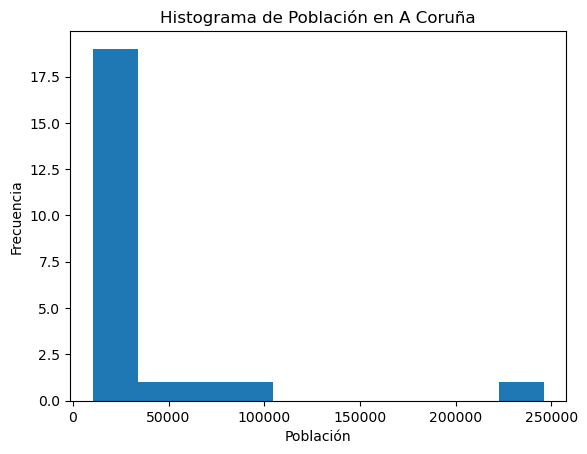

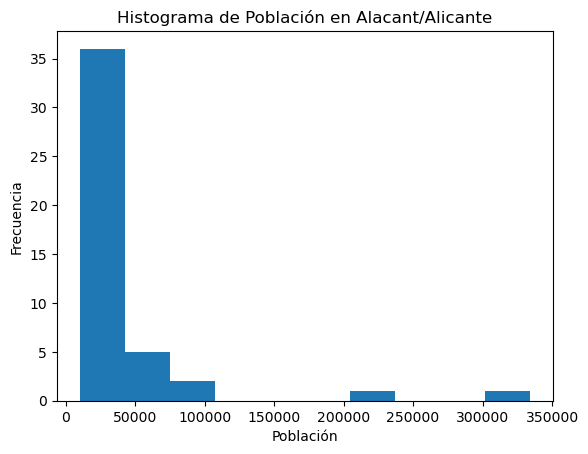

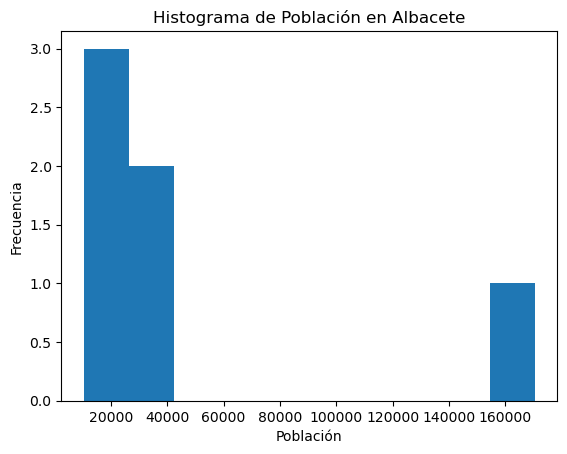

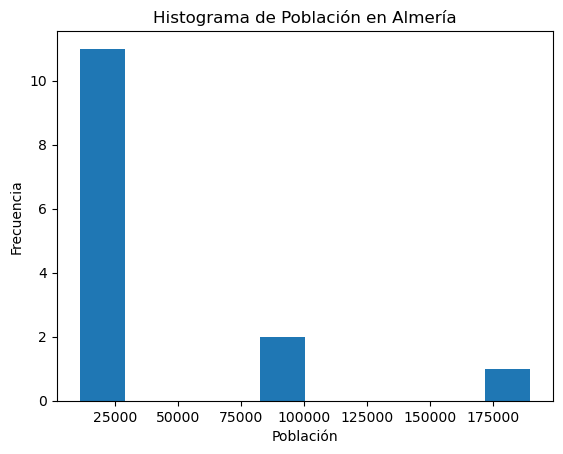

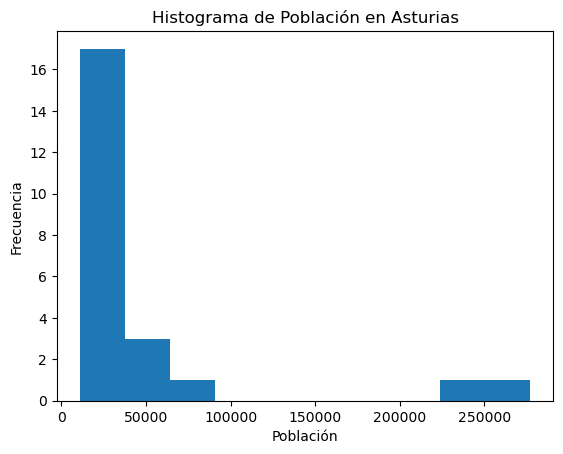

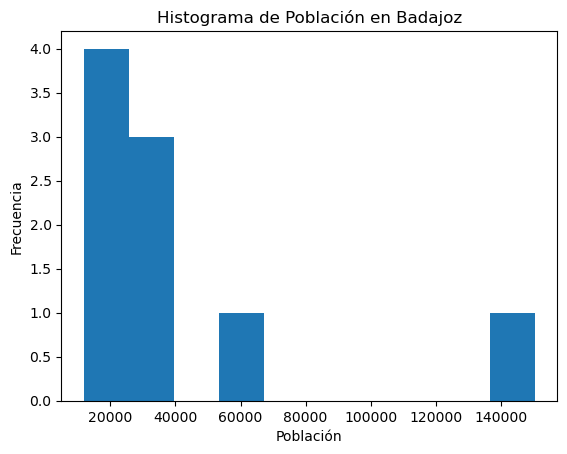

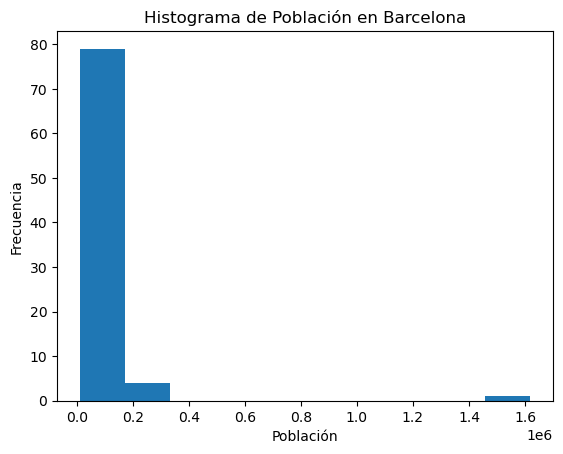

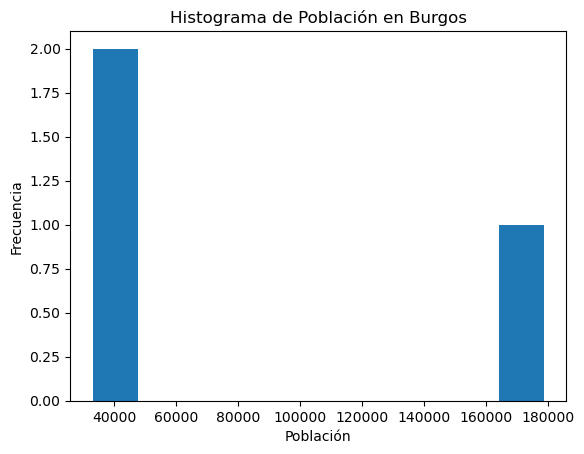

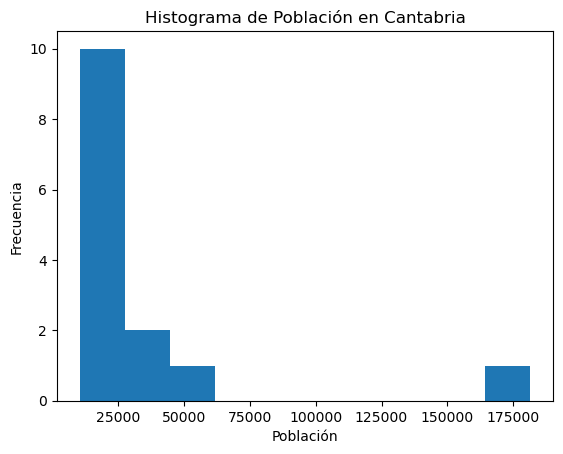

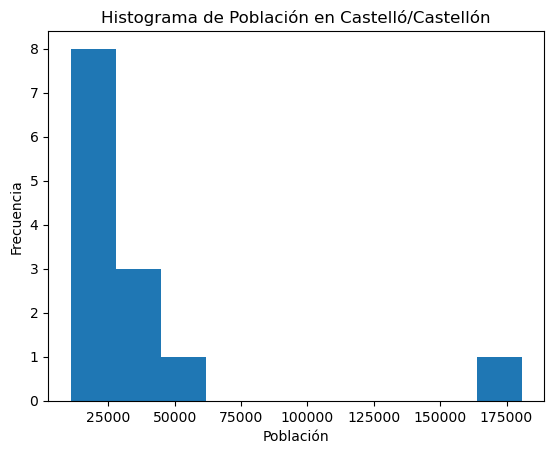

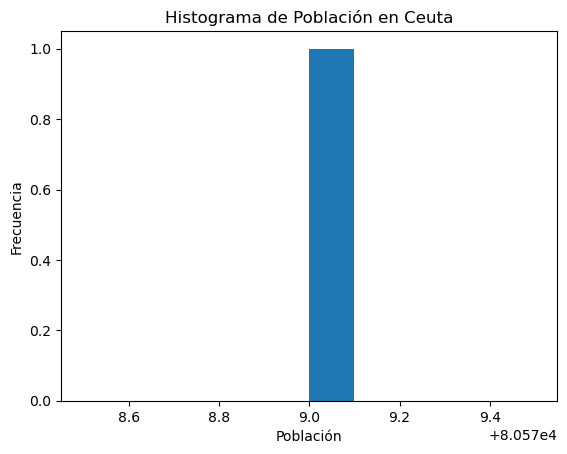

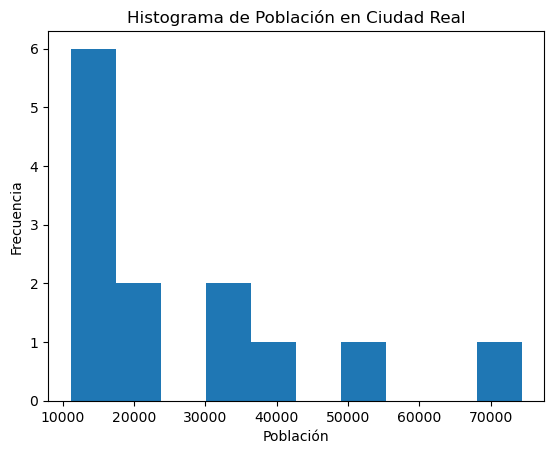

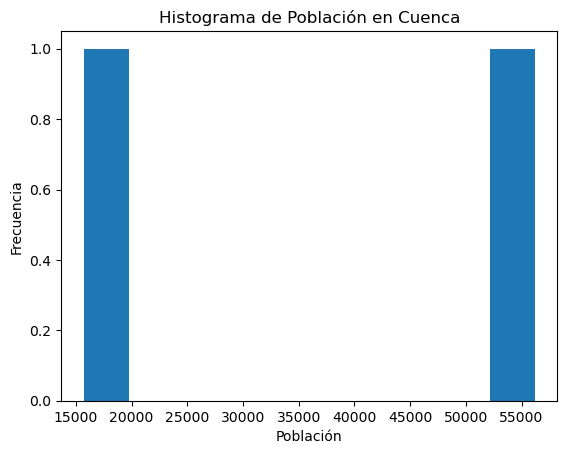

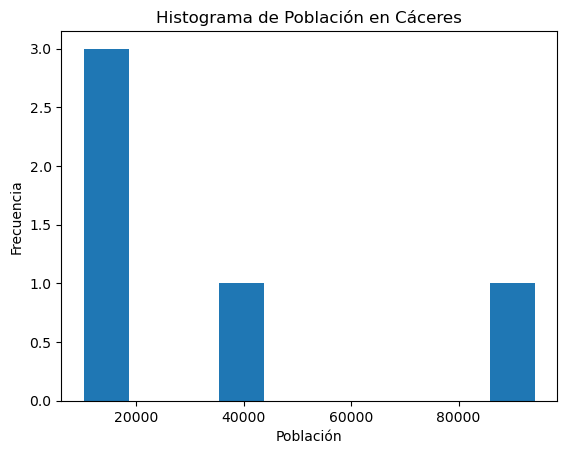

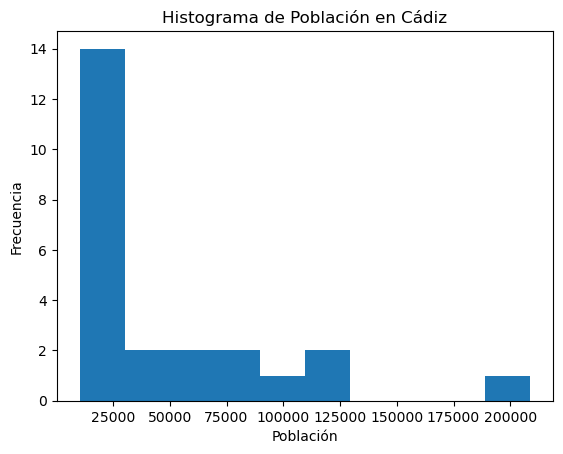

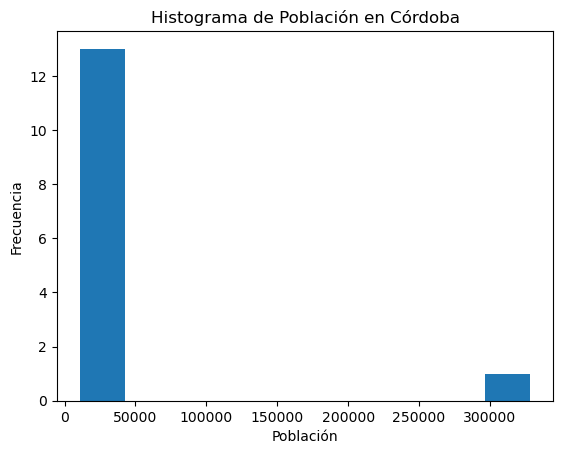

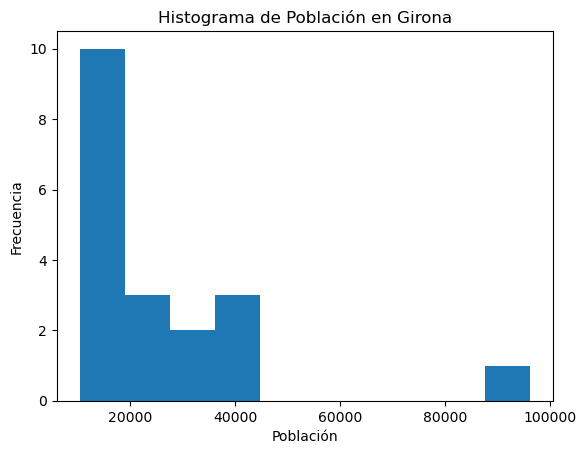

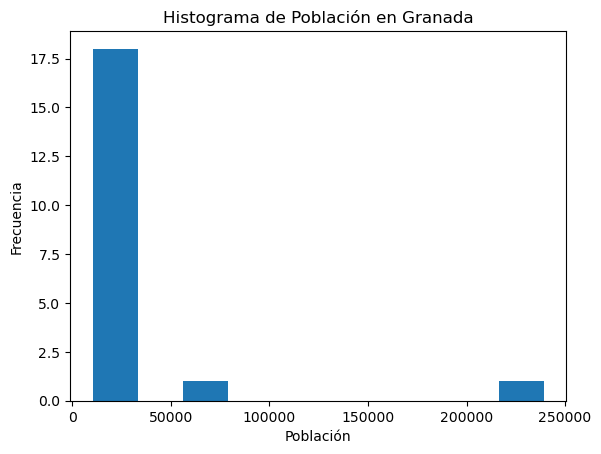

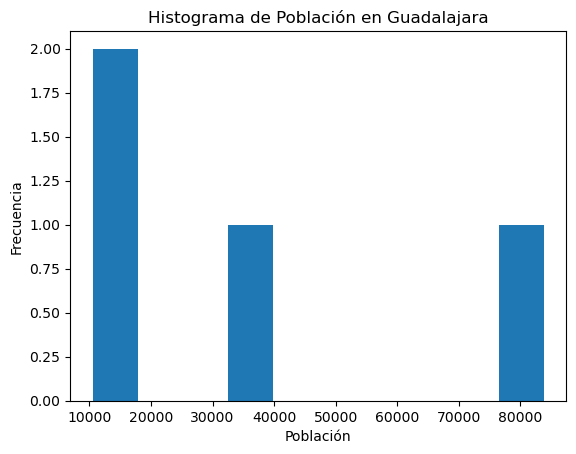

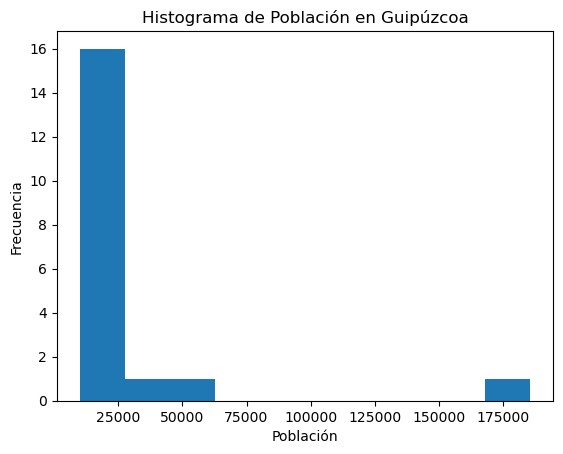

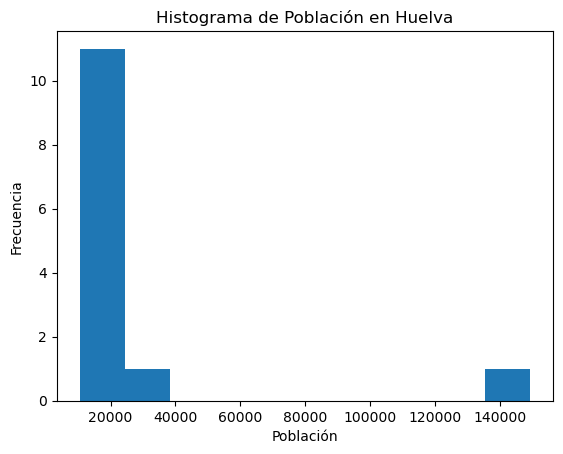

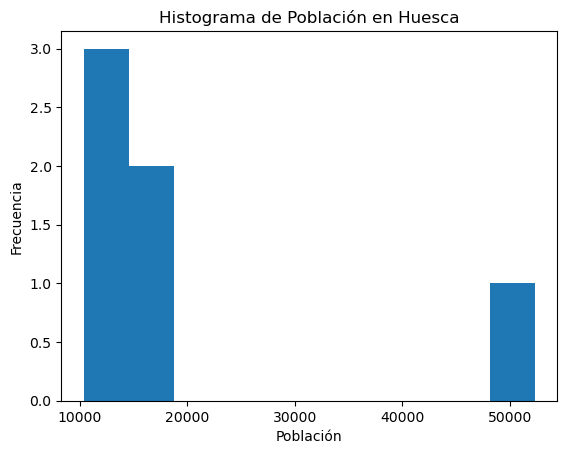

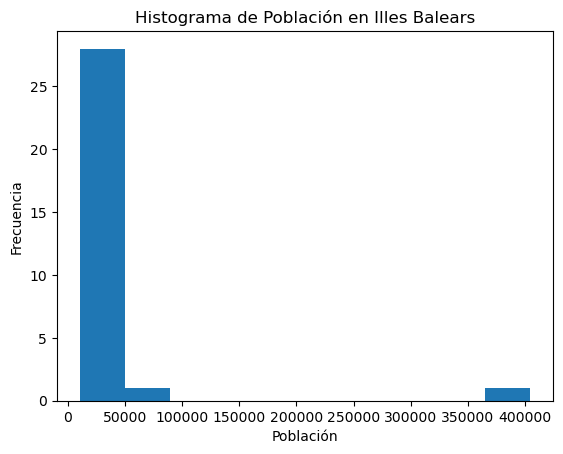

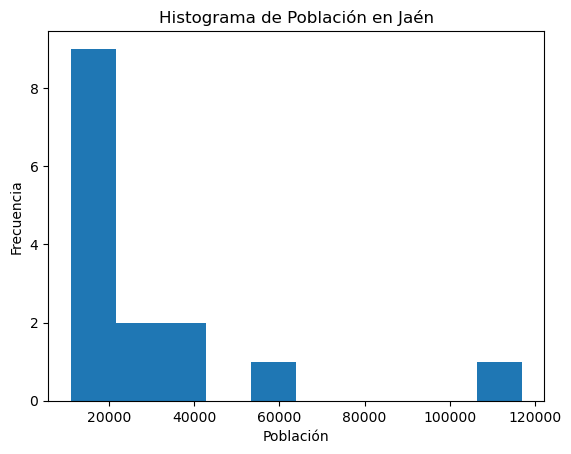

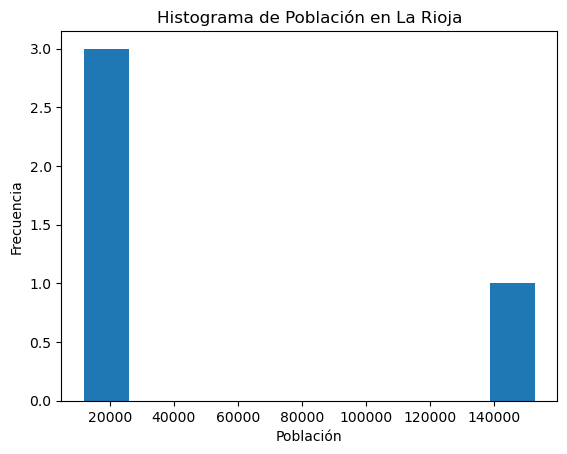

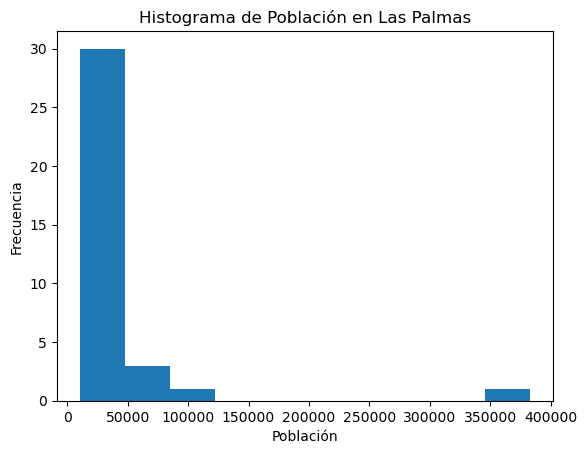

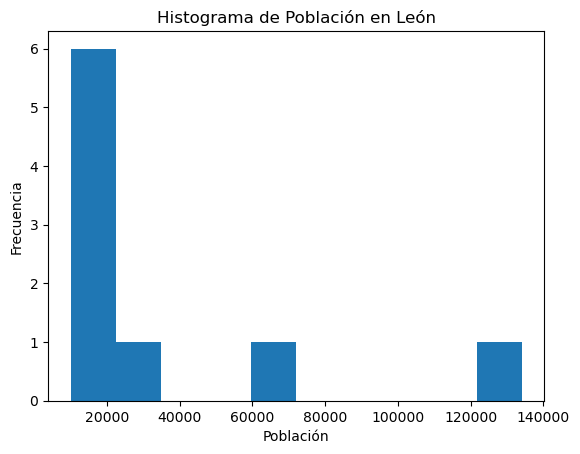

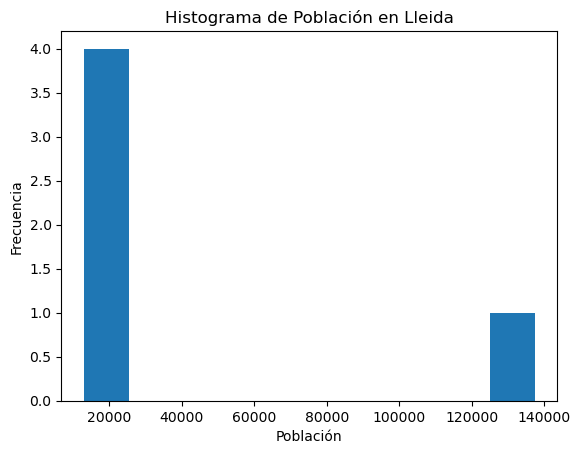

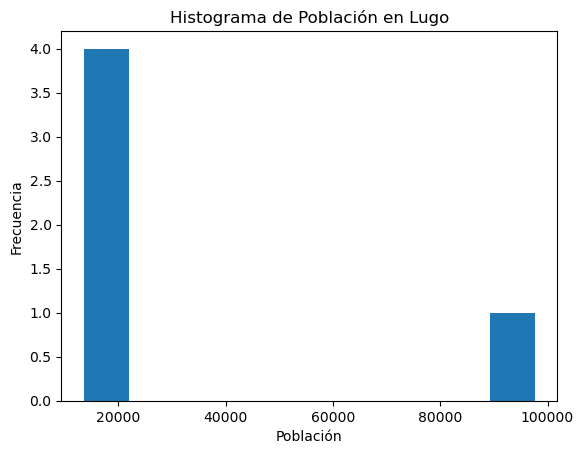

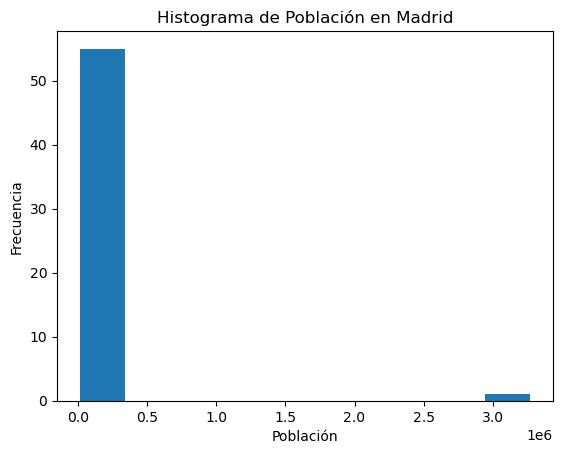

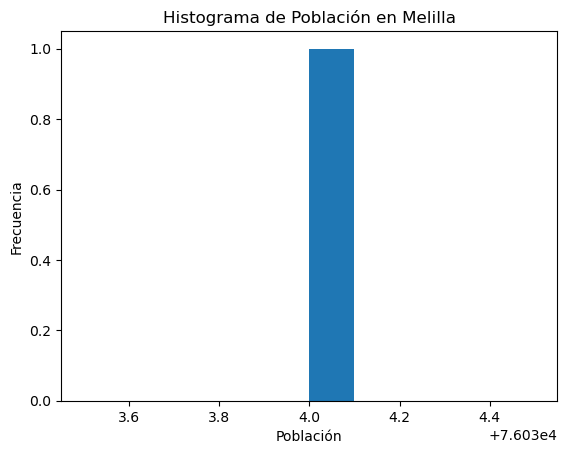

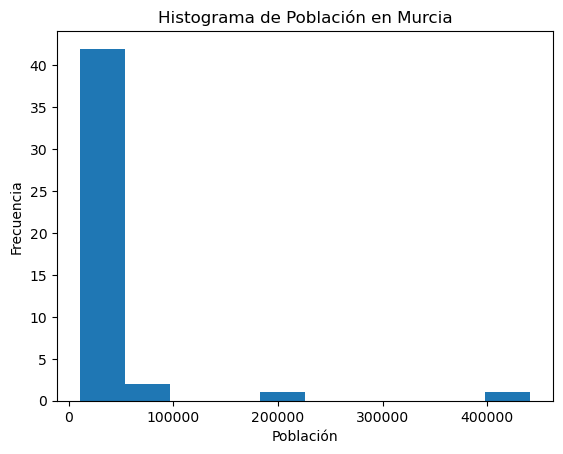

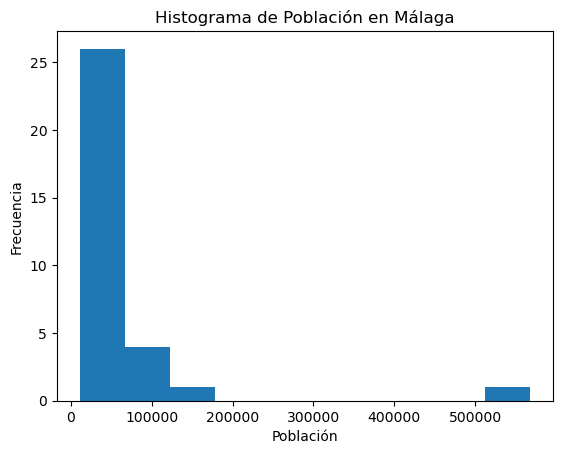

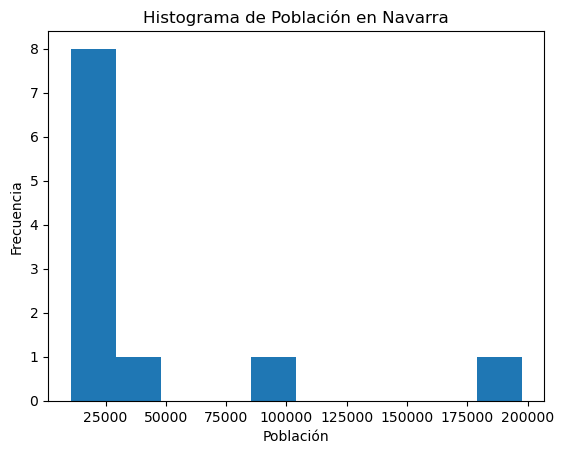

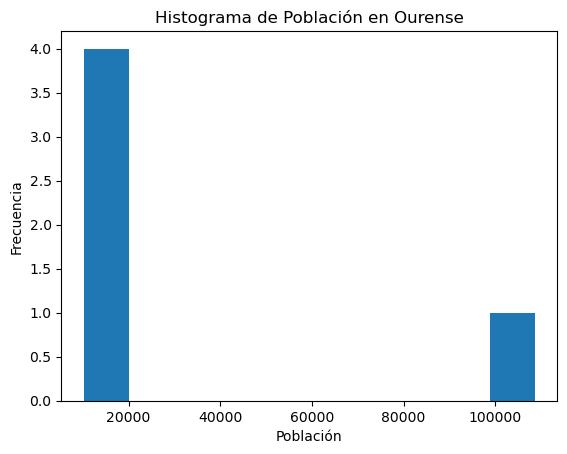

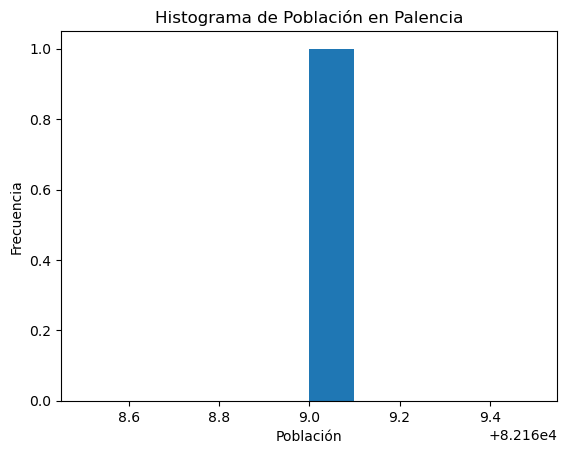

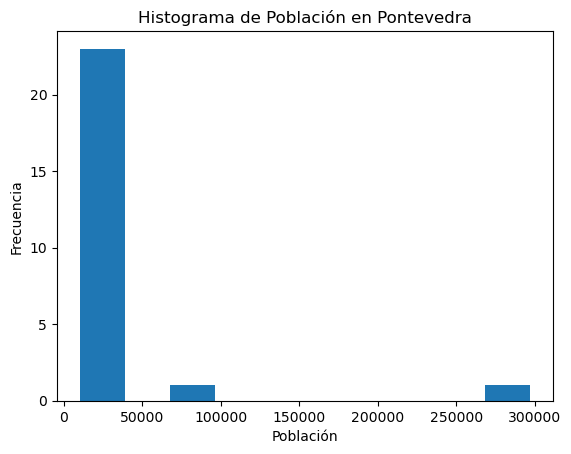

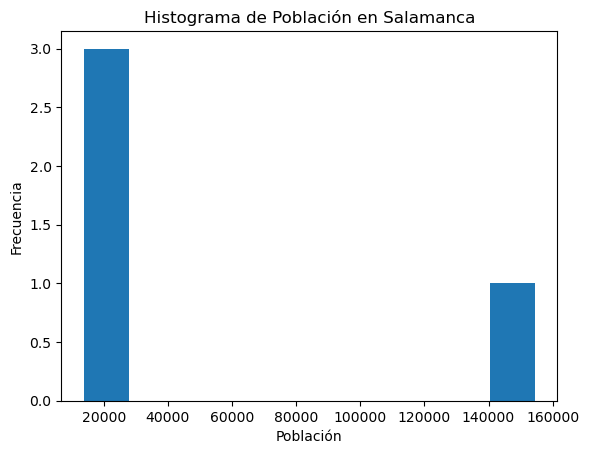

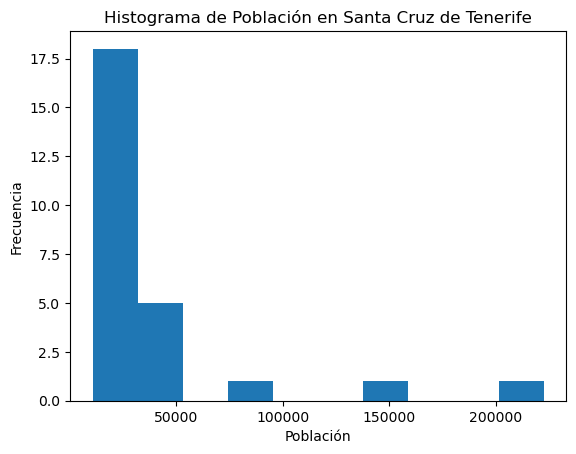

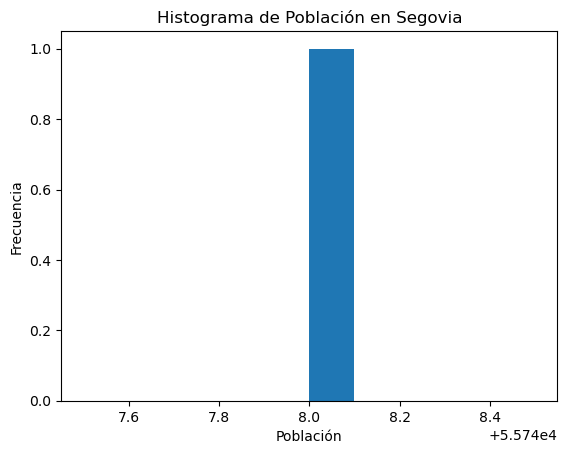

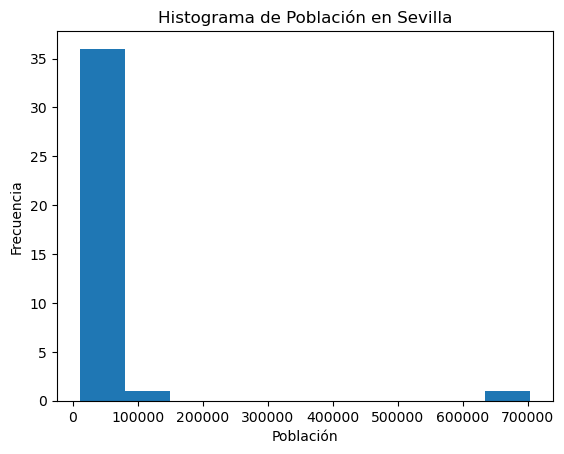

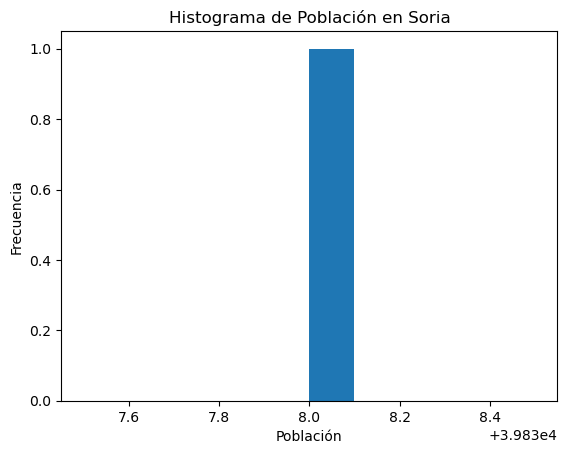

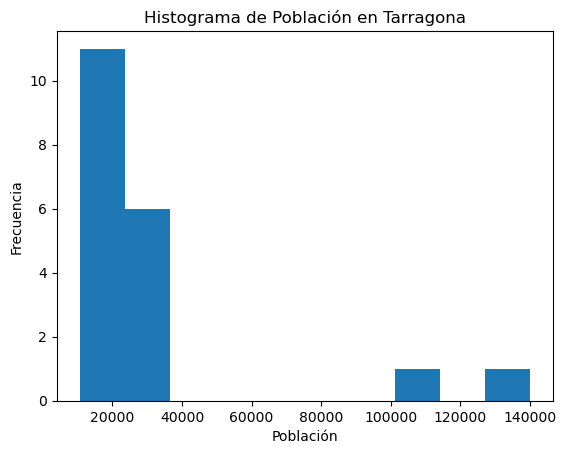

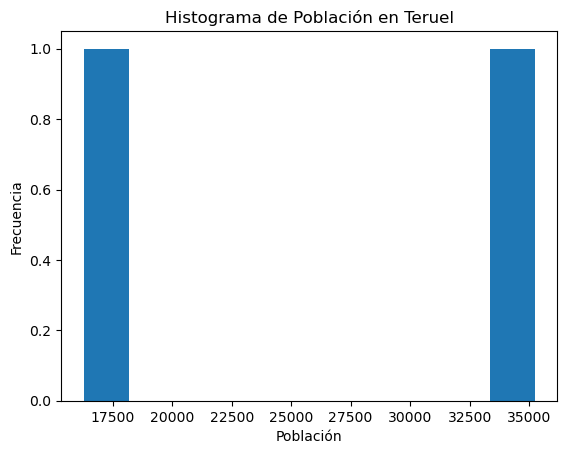

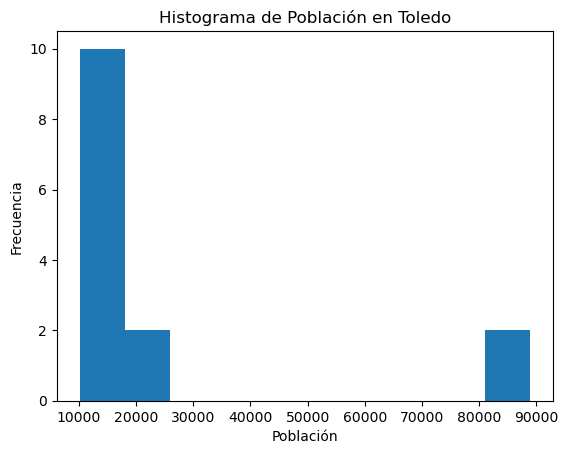

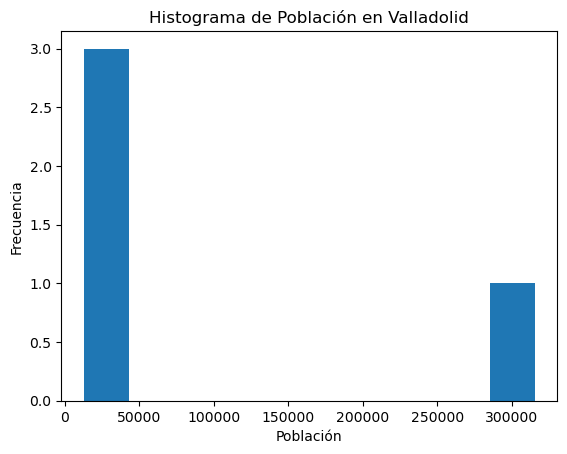

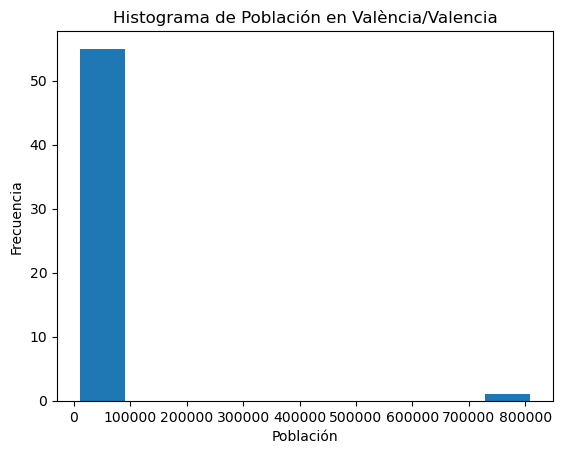

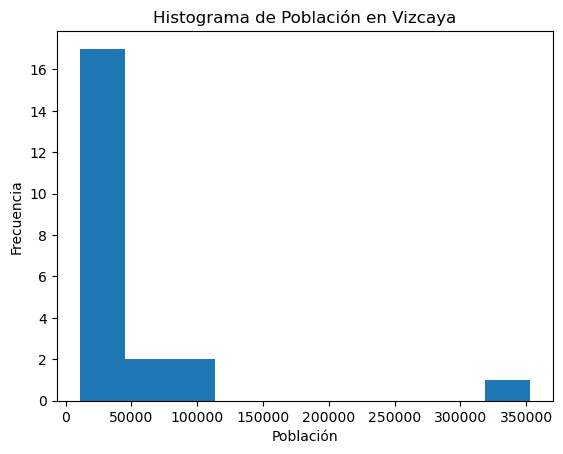

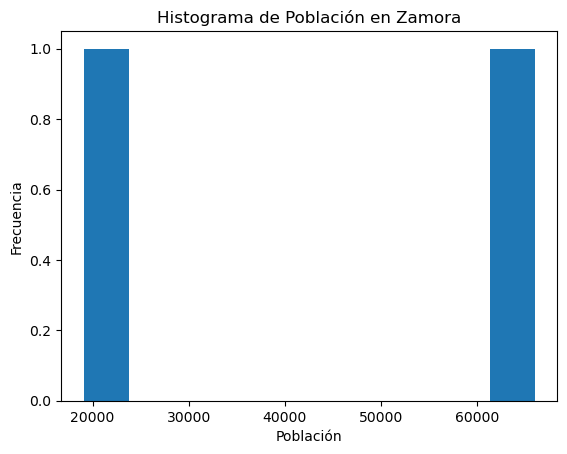

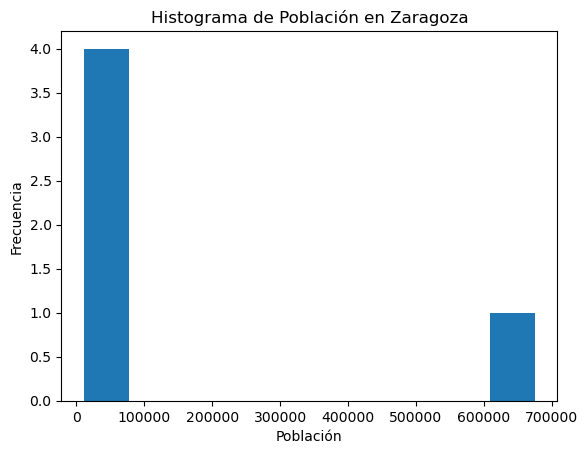

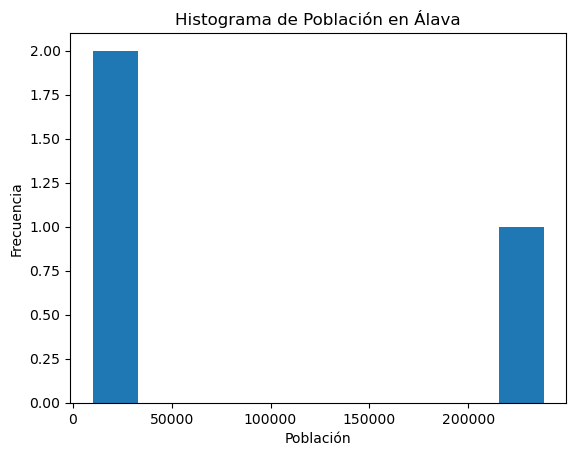

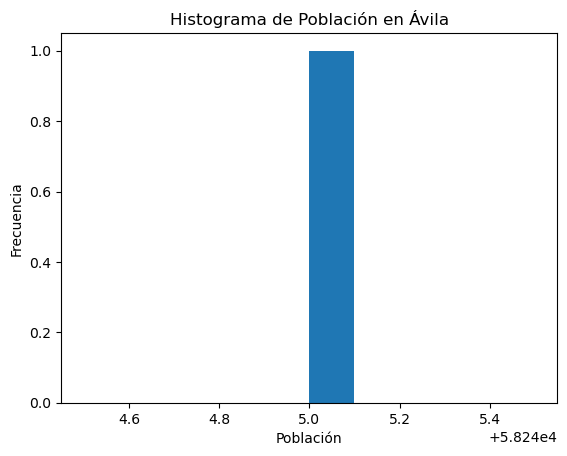

In [62]:
provincias = poblacion.groupby("Provincia")

for provincia, i in provincias:
    plt.hist(i["Poblacion"])
    plt.title("Histograma de Población en " + provincia)
    plt.xlabel("Población")
    plt.ylabel("Frecuencia")
    plt.show()

### 50 Municipios al azar

In [76]:
muestras_municipio = poblacion.sample(n=50, replace=False)

media_muestra = muestras_municipio["Poblacion"].mean()
std_muestra = muestras_municipio["Poblacion"].std()

print("Media de la muestra: ", media_muestra)
print("Desviación estándar de la muestra: ", std_muestra)

Media de la muestra:  38203.16
Desviación estándar de la muestra:  48565.81477321392


### Los municipios mas cercanos y mas lejanos de Madrid


In [87]:
madrid = poblacion[(poblacion["Municipio"] == "Madrid")& (poblacion["Municipio"]== "Madrid")]
madrid_x = madrid.X
madrid_y = madrid.Y 

